# Linear Models

In [2]:
from IPython.display import clear_output
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import numpy as np
from numpy import ndarray
from numpy.random import randint
import pandas as pd
from time import sleep
np.random.seed(3)
plt.style.use('seaborn')
cmap = ListedColormap(sns.color_palette().as_hex())

## Linear function

Consider the function of a line.  
It's a *linear function* that maps the value of x to that of y, and in it's usually written as:

\begin{align}
  y=f(x)=mx+b
\end{align}

Where:
- *y* is the dependent variable
- *x* is the independent variable
- *m* is the slope
- *b* is the intercept

It is named *linear* simply because it can be plotted as a straight line. Let's take a look at some linear functions!

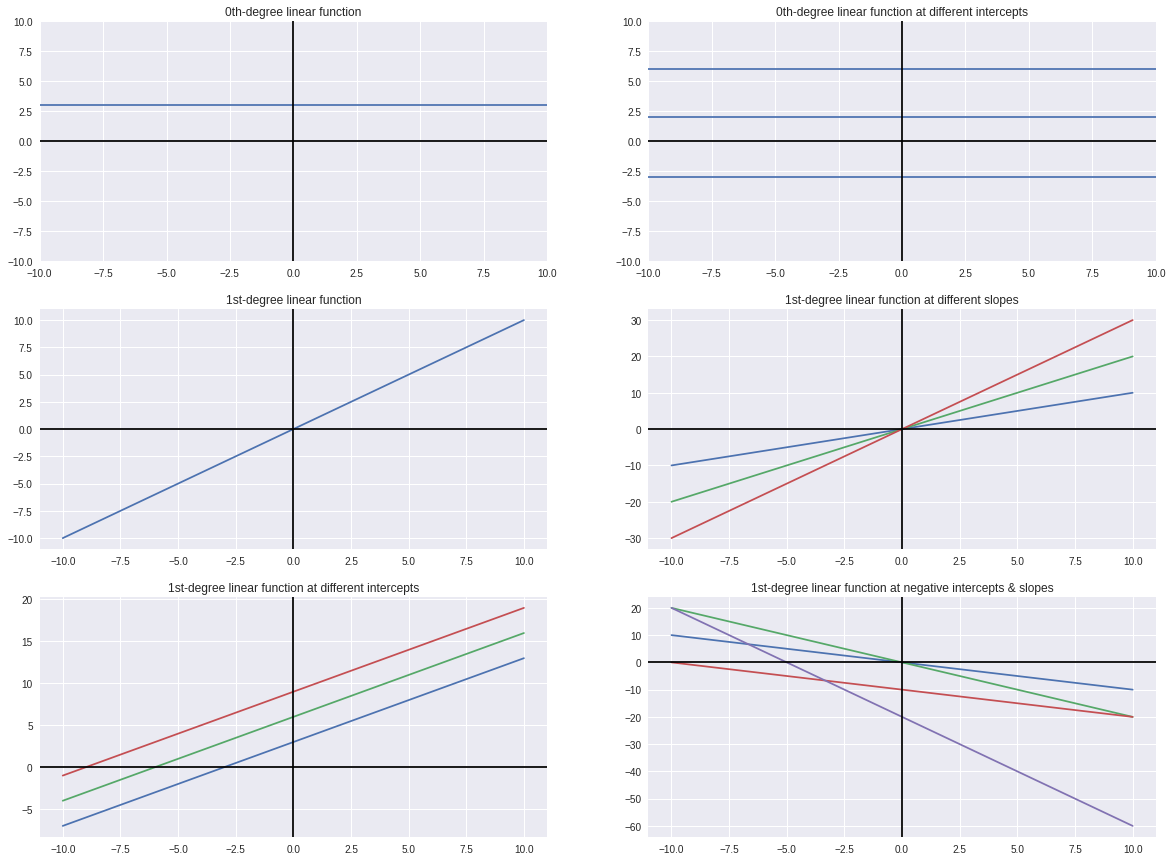

In [3]:
fig, axs = plt.subplots(3, 2, figsize=(20, 15))
# for example, given a 2D linear space
x = np.linspace(-10, 10, 50)
# the simplest linear function is a 0th degree function:
n = 3 # random constant
axs[0,0].axhline(y=n)
# not much usueful since it's constant, I only shown it for teaching purposes
# indeed, this is useful to also understand the intercept of a line, let's see:
axs[0,1].axhline(y=2)
axs[0,1].axhline(y=6)
axs[0,1].axhline(y=-3)
# now, let's plot the simplest useful linear function, which in its simplest
# form lack of the intercept, and it's just a diagonal of the cartesian plane:
axs[1,0].plot(x, 1*x+0)
# this maps all the points of x to those y, but what does it mean?
# tweaking the value of m changes the slope of the line:
axs[1,1].plot(x, x)
axs[1,1].plot(x, 2*x)
axs[1,1].plot(x, 3*x)
# tweaking the value of b changes the intercept of the line:
axs[2,0].plot(x, x+3)
axs[2,0].plot(x, x+6)
axs[2,0].plot(x, x+9)
# values can be negative too, giving rise to downward slopes and
# upward intercepts:
axs[2,1].plot(x, -x)
axs[2,1].plot(x, -2*x)
axs[2,1].plot(x, -x-10)
axs[2,1].plot(x, -4*x-20)
# now plotting
axs[0,0].set_ylim(-10, 10)
axs[0,1].set_ylim(-10, 10)
axs[0,0].set_xlim(-10, 10)
axs[0,1].set_xlim(-10, 10)
axs[0,0].set_title('0th-degree linear function')
axs[0,1].set_title('0th-degree linear function at different intercepts')
axs[1,0].set_title('1st-degree linear function')
axs[1,1].set_title('1st-degree linear function at different slopes')
axs[2,0].set_title('1st-degree linear function at different intercepts')
axs[2,1].set_title('1st-degree linear function at negative intercepts & slopes')
for ax in axs.flatten():
    ax.axhline(0, color='black')
    ax.axvline(0, color='black')
plt.show()

Formarly it's both a polynomial function of degree zero or one and a linear map. But what does it mean?

A polynomial function is just a function with multiple *(=poly)* terms *(=nomia)*, written in the form:

\begin{align}
  f(x)=a_0x^0+a_1x^1+a_2x^2+...a_{n-1}x^{n-1}+a_nx^n
\end{align}

Let's take a look at the 2 possibilities:

- 0th degree: $f(x)=x^0b$
- 1st degree: $f(x)=x^0b+mx^1$

The degree of the polynomial function is just given by the highest exponent in the function. Let's take a look at the graphs below for some visual insight!

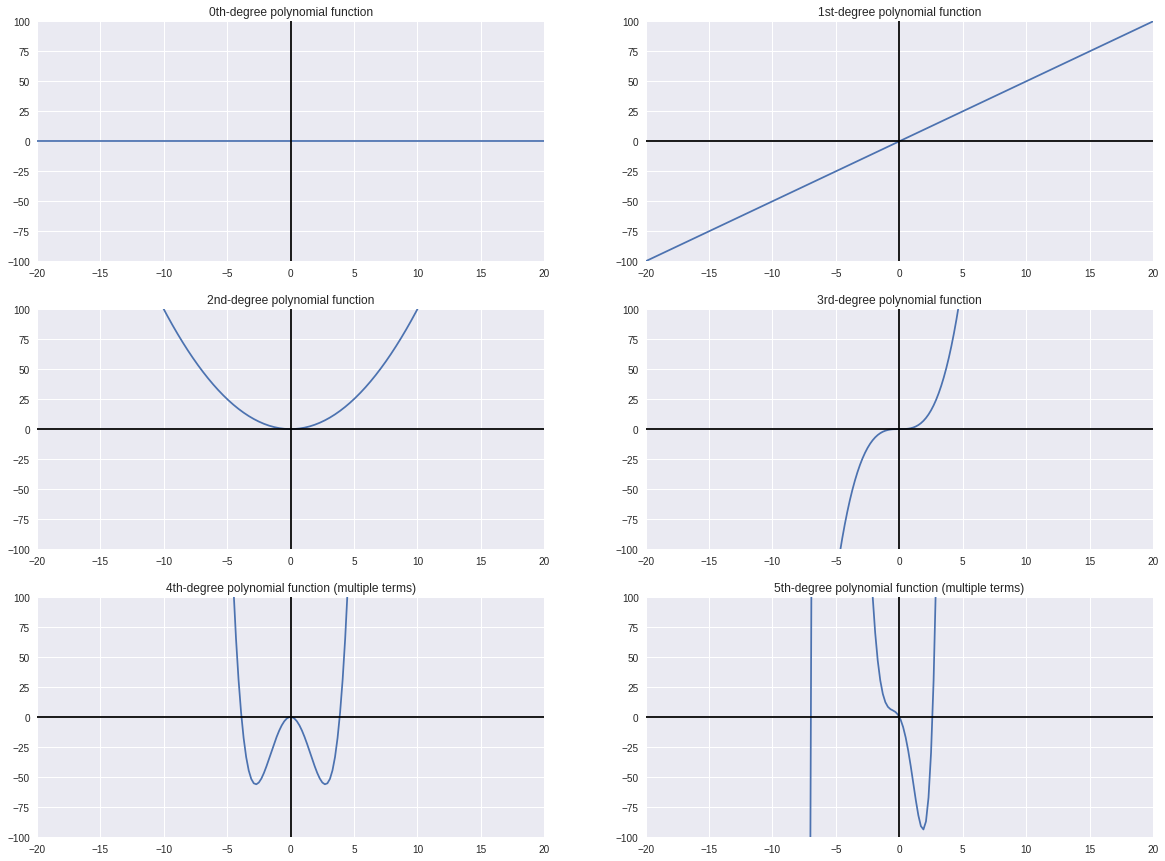

In [4]:
fig, axs = plt.subplots(3, 2, figsize=(20,15))
x = np.linspace(-100, 100, 1000)
# 0th-degree polynomial function:
axs[0,0].axhline(0)
# 1st-degree polynomial function:
axs[0,1].plot(x, 5*x)
# 2nd-degree polynomial function:
axs[1,0].plot(x, x**2)
# 3rd-degree polynomial function:
axs[1,1].plot(x, x**3)
# 4th-degree polynomial function:
axs[2,0].plot(x, x**4-15*x**2)
# 5th-degree polynomial function:
axs[2,1].plot(x, x**5+6*x**4-+10*x**3-25*x**2-20*x)
# plotting stuff
axs[0,0].set_title('0th-degree polynomial function')
axs[0,1].set_title('1st-degree polynomial function')
axs[1,0].set_title('2nd-degree polynomial function')
axs[1,1].set_title('3rd-degree polynomial function')
axs[2,0].set_title('4th-degree polynomial function (multiple terms)')
axs[2,1].set_title('5th-degree polynomial function (multiple terms)')
for i, ax in enumerate(axs.flatten()):
    if i != 0: ax.axhline(0, color='black')
    ax.axvline(0, color='black')
    ax.set_xlim(-20, 20)
    ax.set_ylim(-100, 100)
plt.show()

From these graphs it's clear why we only the first-degree polynomial function is the one used, and why it's named linear!

Now, a map... the *map* is just a function which "maps" the input values to the output. A *linear map* is just a particular map which preserver some properties of of the vector space. For a simple visual intuition, imagine a function that transforms all the points of a cartesian plane without curving the lines and keeping the origin of the axis in the same place.

## Linear Regression

---

*A linear model is nothing more than a linear function whose parameters are estimated from the data using a loss function through the gradient descent algorithm.*

---

### Theory


Let's start with some jargon...

The linear regression can be classfied depending on the:
- number of independent variables x:
    - if x = 1: *simple linear regression*
    - if x > 1: *multiple linear regression*
- number of dependent varibales y:
    - if y = 1: *univariate linear regression*
    - if y > 1: *multivariate linear regression*

... and remember:
- x = independent variable = explanatory variable
- y = dependent variable = response variable

Let's analyze the math to see some pattern...

#### **Simple regression**
*(binomial function with one explanatory variable)*

It's a simple function which maps a single dependent variable to a single independent variable:

\begin{align}
  y=f(x)
\end{align}

For each observation $i$, the function assume the form of:

\begin{align}
  y_i=\beta_0+\beta_1x_i+\epsilon_i
\end{align}

Where $\epsilon$ is the *disturbance term* or *error variable*: an unobserved random variable that adds "noise" to the model

Now we can stack those observations with matrix notation, this has a practical conveninence in computer science (vectorized computation performs way better than endless iteration), the matrix notation is:

\begin{align}
  \begin{pmatrix}
    y_1\\y_2\\y_3\\\vdots\\y_n
  \end{pmatrix} = 
  \begin{pmatrix}
    1&x_1\\1&x_2\\1&x_3\\\vdots&\vdots\\1&x_n
  \end{pmatrix}\cdot
  \begin{pmatrix}
    \beta_0\\\beta_1
  \end{pmatrix} +
  \begin{pmatrix}
    \epsilon_1\\ \epsilon_2 \\ \epsilon_3 \\ \vdots \\ \epsilon_n
  \end{pmatrix}
\end{align}

This can be simplified in another compact matrix notation:

\begin{align}
\pmb y=\pmb X\pmb\beta+\pmb\epsilon
\end{align}


Reminder:  
If you feel confused about the 1 ones... just review the dot product rules:

\begin{align}
  \begin{pmatrix}
    a&b
  \end{pmatrix}
  \cdot
  \begin{pmatrix}
    x\\y
  \end{pmatrix}
  =
  ax+by
\end{align}

#### **Multiple regression**  
*(binomial function with multiple explanatory variables)*

It's a function which maps many independent variables to a single dependent variable:

\begin{align}
  y=f(x_1,x_2,...,x_n)
\end{align}  

For each observation $i$, the function assume the form of:

\begin{align}
  y_i=\beta_0+\beta_1x_{i,1}+\beta_2x_{i,2}+...+\beta_nx_{i,n}+\epsilon_i
\end{align}  

If you remember a bit of linear algebra, you'll know that we can write this as a dot product, in particular:

\begin{align}
  \beta_0+\beta_1x_{1}+\beta_2x_{2}+...+\beta_nx_{n}=
  \begin{pmatrix}
    x_0&x_1&x_2&\cdots&x_n
  \end{pmatrix}
  \cdot
  \begin{pmatrix}
    \beta_0\\\beta_1\\\beta_2\\\vdots\\\beta_n
  \end{pmatrix}=
  \pmb x^T\pmb\beta
\end{align}  

Therefore, for each observation $i$:

\begin{align}
  y_i=\pmb x_i^T\pmb\beta+\epsilon_i
\end{align}

Stacking all the $i$ observations in matrix notation:

\begin{align}
  \begin{pmatrix}
    y_1\\ y_2 \\ y_3 \\ \vdots \\ y_n
  \end{pmatrix} = 
  \begin{pmatrix}
    x^T_1\\x^T_2\\x^T_3\\\vdots\\x^T_n
  \end{pmatrix} \cdot
  \begin{pmatrix}
    \beta_1\\ \beta_2 \\ \beta_3 \\ \vdots \\ \beta_{m}
  \end{pmatrix} +
  \begin{pmatrix}
    \epsilon_1\\ \epsilon_2 \\ \epsilon_3 \\ \vdots \\ \epsilon_n
  \end{pmatrix}
\end{align}

But since the x terms are just transposed column vectors, this means they're just the rows of the new matrix!

\begin{align}
  \begin{pmatrix}
    y_1\\ y_2 \\ y_3 \\ \vdots \\ y_n
  \end{pmatrix} = 
  \begin{pmatrix}
    x_{1,1} & x_{1,2} & \cdots & x_{1,m} \\
    x_{2,1} & x_{2,2} & \cdots & x_{2,m} \\
    x_{3,1} & x_{3,2} & \cdots & x_{3,m} \\
    \vdots  & \vdots  & \ddots & \vdots  \\
    x_{n,1} & x_{n,2} & \cdots & x_{n, m}
  \end{pmatrix} \cdot
  \begin{pmatrix}
    \beta_1\\ \beta_2 \\ \beta_3 \\ \vdots \\ \beta_{m}
  \end{pmatrix} +
  \begin{pmatrix}
    \epsilon_1\\ \epsilon_2 \\ \epsilon_3 \\ \vdots \\ \epsilon_n
  \end{pmatrix}
\end{align}

Therefore, in compact matrix notation:

\begin{align}
\pmb y=\pmb X\pmb\beta+\pmb\epsilon
\end{align}

Fitting the line to the data happens through the minimization of a loss function, which is a function that gives a measure of the error. The error in this case is some elaboration of the delta between the y value on the line and the actual y value, mapped to the same x value.

Common ways to calculate the error are:
- sum of the residuals: $\sum {(\pmb y-f(\pmb X))}$
- sum of absolute value of residuals: $\sum {|\pmb y-f(\pmb X)|}$
- sum of squared residuals: $\sum {(\pmb y-f(\pmb X))^2}$
- root of squared residuals sum: $\sqrt {\sum (\pmb y-f(\pmb X))^2}$


Now, the jargon here can be often quite ambiguous:
- SSE (sum of squared residuals) == RSS (residual sum of the squares)
- MSE (mean squared error) == average of SSE/RSS
- OLS (ordinary least squares) it's an algorithm, not a function!

#### Ordinary Least Square:

In regression often we speak about the ordinary least square:
\begin{align}
 \min_{\beta}||X\beta-y||_2^2
\end{align}

### Math

Given the linear function:
\begin{align}
  \pmb{\hat y}=\pmb X\pmb\beta+\pmb\epsilon
\end{align}

(Which remember, is in matrix notation, so bold-lowercase = (column) vector, bold-uppercase = matrix)

Given the mean square error:
\begin{align}
  mse=\frac{1}{n}\sum^n_{i=1}(\pmb y_i-\pmb{\hat y}_i)^2
\end{align}

Then, we can write the loss function as a function of the slope and intercept, which are the paramters of the model to be tweaked in order to minimize the loss and improve the fit of the line on the data:
\begin{align}
  \mathcal L(\pmb \beta,\pmb \epsilon)=\frac{1}{n}\sum^n_{i=1}(\pmb y_i-(\pmb X\pmb\beta+\pmb\epsilon)_i)^2
\end{align}

In order to minize the function is necessary to calculate the gradient, to find where it is more steep. The partial derivatives of mse loss are easily calculated:
\begin{align}
  \frac{\partial}{\partial {\pmb\beta}}L=-\frac{2}{n}\sum^n_{i=1}\pmb X_i(\pmb y_i-(\pmb X\pmb\beta+\pmb\epsilon)_i)
\end{align}
\begin{align}
  \frac{\partial}{\partial {\pmb\epsilon}}L=-\frac{2}{n}\sum^n_{i=1}(\pmb y_i-(\pmb X\pmb\beta+\pmb\epsilon)_i)
\end{align}

With the gradient of mse loss function being:
\begin{align}
  \nabla{\mathcal L}=
  \begin{pmatrix}
    \frac{\partial\mathcal L}{\partial\pmb\beta} \\
    \frac{\partial\mathcal L}{\partial\pmb\epsilon}
  \end{pmatrix}=
  \begin{pmatrix}
    \frac{2}{n}\sum^n_i\pmb X_i(\pmb{\hat y}_i-\pmb y_i) \\
    \frac{2}{n}\sum^n_i(\pmb{\hat y}_i-\pmb y_i)
  \end{pmatrix}
\end{align}

To improve the fitting of the line we need to minimize the loss, this is achieved through the *gradient descent algorhitm*, which essentially updates the slope and intercept paramters using the loss multiplied by a learning rate:
\begin{align}
  \Theta:=\Theta-\alpha\nabla\mathcal L
\end{align}

The update function which result is:
\begin{align}
  \pmb\beta:=\pmb\beta-\alpha\frac{\partial}{\partial\pmb\beta}
\end{align}
\begin{align}
  \pmb\epsilon:=\pmb\epsilon-\alpha\frac{\partial}{\partial\pmb\epsilon}
\end{align}

### Implementation

#### From scratch

Here's the goal:

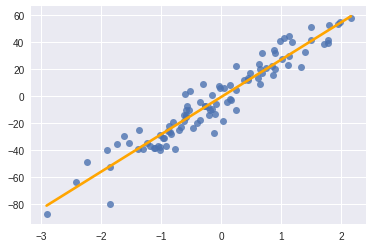

In [ ]:
# generate fake data with a linear distribution
from sklearn.datasets import make_regression
X, y = make_regression(n_samples=100, n_features=1, noise=10)
# plot the data and the linear regression line
sns.regplot(x=X, y=y, ci=None, line_kws={'color':'orange'})
plt.show()

Let's start dividing and plotting the data:

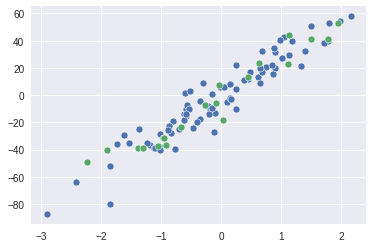

In [ ]:
# spit the data in train and validation set
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(
    X, y,
    test_size=0.2,
    random_state=3
)
sns.scatterplot(x=X_train.squeeze(), y=y_train, cmap=cmap)
sns.scatterplot(x=X_val.squeeze(), y=y_val, cmap=cmap)
plt.show()

Let's code the regressor:

In [ ]:
class LinearRegressor:

    def __init__(self) -> None:
        self.beta = None
        self.epsilon = 0
    
    def predict(self,
                X: ndarray
                ) -> ndarray:
        yp = np.dot(X, self.beta) + self.epsilon
        return yp

    def _cycle(self,
               X: ndarray,
               y: ndarray,
               lr:int
               ) -> None:
        yp = self.predict(X)
        n = y.shape[0]
        delta = yp - y
        d_beta = 2 * np.sum(X.T * delta.reshape(1,-1)) / n
        d_epsilon = 2 * np.sum(delta) / n
        self.beta -= lr * d_beta
        self.epsilon -= lr * d_epsilon
    
    def fit(self,
            X: ndarray,
            y: ndarray,
            lr: int,
            epochs: int
            ) -> None:
        self.beta = np.zeros(X.shape[1])
        for epoch in range(epochs):
            self._cycle(X, y, lr)
    
    def mse(self,
            y: ndarray,
            yp: ndarray
            ) -> int:
        mse = np.mean(np.square(y-yp))
        return mse

    def fit_n_plot(self,
                   X: ndarray,
                   y: ndarray,
                   lr: int,
                   epochs: int,
                   sleep_time: int = 1
                   ) -> None:
        self.beta = np.zeros(X.shape[1])
        mse_list = []
        for epoch in range(epochs):
            self._cycle(X, y, lr)
            yp = self.predict(X)
            mse = self.mse(y, yp)
            mse_list.append(mse)
            fig, axs = plt.subplots(1, 2, figsize=(16,8))
            axs[1].title.set_text(f'MSE: {mse:.0f}')
            axs[0].title.set_text('Regression line')
            axs[1].set_ylim(ymin=0, ymax=np.max(mse_list))
            axs[1].set_xlim(xmin=0, xmax=epochs)
            linspace = np.linspace(0, epochs)
            axs[1].plot(mse_list, color=cmap.colors[2], linewidth=2)
            sns.scatterplot(x=X.squeeze(), y=y, s=50, cmap=cmap, ax=axs[0])
            sns.lineplot(x=X.squeeze(), y=yp,
                         color='orange', linewidth=3, ax=axs[0]
                         )
            clear_output()
            plt.show()
            sleep(sleep_time)
    
    def pred_n_info(self,
                    X: ndarray,
                    y: ndarray,
                    plot: bool = True
                    ) -> ndarray:
        yp = self.predict(X)
        mse = self.mse(yp, y)
        i = np.random.randint(0, len(y_val)-1)
        print(f'MSE:\t\t\t{mse:.2f}')
        print(f'Sample predicted y:\t{yp[i]:.0f}')
        print(f'Sample actual y:\t{y[i]:.0f}')
        if plot:
            plt.figure(figsize=(10,6))
            sns.scatterplot(x=X.squeeze(), y=y, s=100, cmap=cmap)
            sns.lineplot(x=X.squeeze(), y=yp, color='orange', linewidth=3)
        return yp

Let's see it in action (run the cell, it's animated):

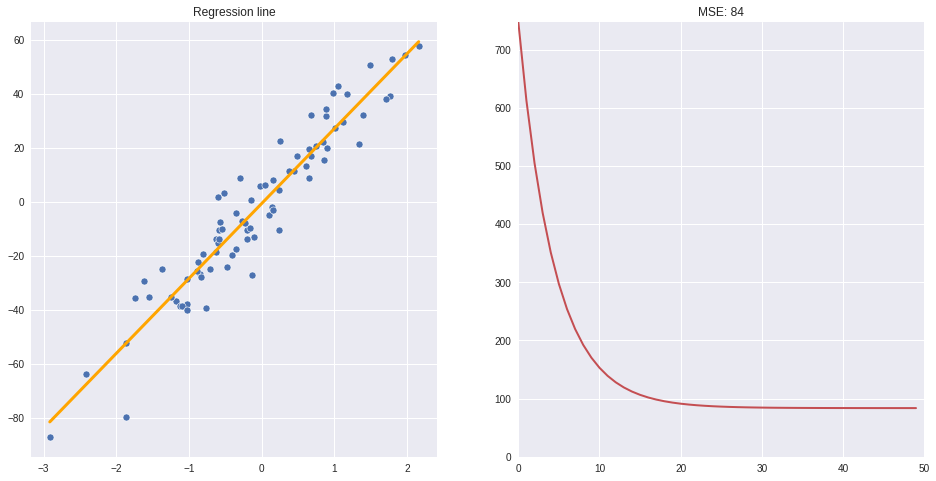

In [ ]:
regressor = LinearRegressor()
regressor.fit_n_plot(X_train, y_train, lr=0.05, epochs=50, sleep_time=1)

MSE:			69.37
Sample predicted y:	-8
Sample actual y:	-7


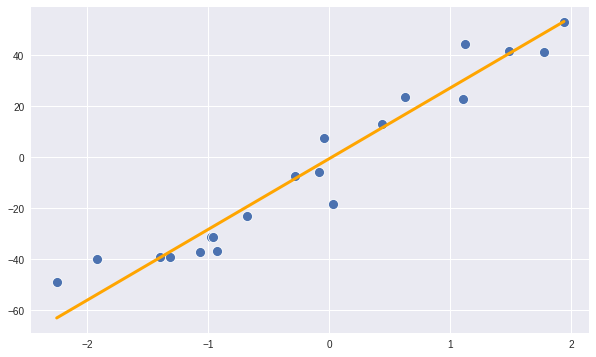

In [ ]:
y_pred = regressor.pred_n_info(X_val, y_val)

## Logistic Regression

*Logistic functions* are used to map the output of a linear function as $f:\mathbb R\to\mathbb [0,1]$

There are many types of logistic functions, the main ones being:
- step function:
\begin{align}
  f(x) = \begin{cases}
  0 & \mbox{if } x>0 \\
  1 & \mbox{if } x\le0
  \end{cases}
\end{align}
- sigmoid function:
\begin{align}
  f(x)=\frac{1}{1-e^{-x}}
\end{align}
- tanh function:
\begin{align}
  f(x)=\frac{e^x – e^{-x}}{e^x + e^{-x}}
\end{align}